**Data Diri**

Nama : Tiara Adinda Putri \
Domisili : Jakarta \
Email : tiara.adinda@sci.ui.ac.id

In [5]:
pip install split-folders

In [6]:
import tensorflow as tf
import zipfile,os

import splitfolders 

from tensorflow.keras.preprocessing.image import ImageDataGenerator

import numpy as np
from google.colab import files
from keras.preprocessing import image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline

# Persiapan Data

In [4]:
!wget --no-check-certificate \
  https://dicodingacademy.blob.core.windows.net/picodiploma/ml_pemula_academy/rockpaperscissors.zip -O /tmp/rockpaperscissors.zip

--2021-07-15 13:42:52--  https://dicodingacademy.blob.core.windows.net/picodiploma/ml_pemula_academy/rockpaperscissors.zip
Resolving dicodingacademy.blob.core.windows.net (dicodingacademy.blob.core.windows.net)... 52.239.197.36
Connecting to dicodingacademy.blob.core.windows.net (dicodingacademy.blob.core.windows.net)|52.239.197.36|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 322873683 (308M) [application/zip]
Saving to: ‘/tmp/rockpaperscissors.zip’

/tmp/rockpapersciss 100%[===================>] 307.92M  7.69MB/s    in 54s     

2021-07-15 13:43:47 (5.74 MB/s) - ‘/tmp/rockpaperscissors.zip’ saved [322873683/322873683]



In [7]:
local_zip = '/tmp/rockpaperscissors.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/tmp')
zip_ref.close()

os.listdir('/tmp/rockpaperscissors')

['README_rpc-cv-images.txt',
 'validation',
 'paper',
 '.ipynb_checkpoints',
 'scissors',
 'rps-cv-images',
 'rock',
 'train',
 'val']

In [8]:
splitfolders.ratio( '/tmp/rockpaperscissors/rps-cv-images', output = '/tmp/rockpaperscissors', seed = 47, ratio = (.6,.4) )

train_dir = os.path.join('/tmp/rockpaperscissors', 'train')
validation_dir = os.path.join('/tmp/rockpaperscissors','validation')

Copying files: 2188 files [00:04, 502.87 files/s]


In [9]:
train_paper = os.path.join(train_dir, 'paper')
train_rock = os.path.join(train_dir, 'rock')
train_scissors = os.path.join(train_dir, 'scissors')

val_paper = os.path.join(validation_dir, 'paper')
val_rock = os.path.join(validation_dir, 'rock')
val_scissors = os.path.join(validation_dir, 'scissors')

In [10]:
train_datagen = ImageDataGenerator(
                    rescale=1./255,
                    rotation_range=20,
                    horizontal_flip=True,
                    shear_range = 0.2,
                    zoom_range=[0.5,1.0],
                    fill_mode = 'nearest')
test_datagen = ImageDataGenerator(
                    rescale=1./255,
                    rotation_range=20,
                    horizontal_flip=True,
                    shear_range = 0.2,
                    zoom_range=[0.5,1.0],
                    fill_mode = 'nearest')

In [11]:
print('Kemudian akan didapat gambar dengan : ')
train_generator = train_datagen.flow_from_directory(train_dir,
                                                    target_size=(150,150),
                                                    batch_size = 64,
                                                    class_mode = 'categorical')
validation_generator = train_datagen.flow_from_directory(validation_dir,
                                                         target_size=(150,150),
                                                         batch_size = 64,
                                                         class_mode = 'categorical')

Kemudian akan didapat gambar dengan : 
Found 1312 images belonging to 3 classes.
Found 876 images belonging to 3 classes.


# Melatih Data

In [12]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(150, 150, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(3, activation='softmax')
])

model.compile(loss='categorical_crossentropy', optimizer=tf.optimizers.Adam(), metrics=['accuracy'])



In [14]:
print ('dengan 10 kali pengulangan maka didapat : ')
model_1 = model.fit(train_generator,
                    steps_per_epoch=20,
                    epochs=10,
                    validation_data=validation_generator,
                    validation_steps=10,
                    verbose=2)

dengan 10 kali pengulangan maka didapat : 
Epoch 1/10
20/20 - 59s - loss: 0.3181 - accuracy: 0.8798 - val_loss: 0.3199 - val_accuracy: 0.8875
Epoch 2/10
20/20 - 59s - loss: 0.2645 - accuracy: 0.8942 - val_loss: 0.2720 - val_accuracy: 0.8969
Epoch 3/10
20/20 - 60s - loss: 0.2424 - accuracy: 0.9109 - val_loss: 0.2935 - val_accuracy: 0.9047
Epoch 4/10
20/20 - 59s - loss: 0.2339 - accuracy: 0.9191 - val_loss: 0.1940 - val_accuracy: 0.9281
Epoch 5/10
20/20 - 59s - loss: 0.2266 - accuracy: 0.9207 - val_loss: 0.1940 - val_accuracy: 0.9359
Epoch 6/10
20/20 - 59s - loss: 0.2027 - accuracy: 0.9223 - val_loss: 0.2022 - val_accuracy: 0.9312
Epoch 7/10
20/20 - 59s - loss: 0.1758 - accuracy: 0.9407 - val_loss: 0.1444 - val_accuracy: 0.9547
Epoch 8/10
20/20 - 59s - loss: 0.1275 - accuracy: 0.9567 - val_loss: 0.1059 - val_accuracy: 0.9672
Epoch 9/10
20/20 - 59s - loss: 0.1001 - accuracy: 0.9679 - val_loss: 0.1576 - val_accuracy: 0.9469
Epoch 10/10
20/20 - 59s - loss: 0.1092 - accuracy: 0.9591 - val_lo

# Uji Coba

Silahkan masukkan gambar yang ingin diketahui


Saving 04l5I8TqdzF9WDMJ.png to 04l5I8TqdzF9WDMJ (1).png
04l5I8TqdzF9WDMJ.png
Ini adalah Kertas


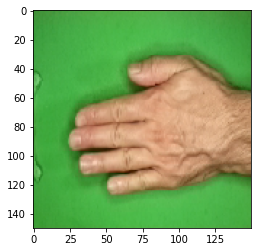

In [15]:
print('Silahkan masukkan gambar yang ingin diketahui') 
uploaded = files.upload()

for fn in uploaded.keys():
 
  # predicting images
  path = fn
  img = image.load_img(path, target_size=(150,150))
  imgplot = plt.imshow(img)
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)
 
  images = np.vstack([x])
  classes = model.predict(images, batch_size=64)
  
  print(fn)
  if classes[0][0]==1:
    print('Ini adalah Kertas')
  elif classes[0][1]==1:
    print('Ini adalah Batu')
  else :
    print('Ini adalah Gunting')